In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents


In [52]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/.env


True

In [53]:
%%time

from llm_toolkit.eval_openai import *
from tqdm.notebook import tqdm

tqdm.pandas()

data_path = os.getenv("DATA_PATH")
results_path = "paper/data/ollama_model_results_v3-RTX4090_metrics.csv"
num_ctx = os.getenv("NUM_CTX")
data_path, results_path, num_ctx

CPU times: user 136 μs, sys: 74 μs, total: 210 μs
Wall time: 203 μs


('dataset/GMRID_v3.csv',
 'paper/data/ollama_model_results_v3-RTX4090_metrics.csv',
 '8192')

In [54]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.data_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   138 non-null    object 
 1   shots                   138 non-null    int64  
 2   eval_time               138 non-null    float64
 3   f1                      138 non-null    float64
 4   accuracy                138 non-null    float64
 5   f1_raw                  138 non-null    float64
 6   accuracy_raw            138 non-null    float64
 7   ratio_valid_categories  138 non-null    float64
 8   total_tokens            138 non-null    int64  
 9   eval_speed              138 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 10.9+ KB


In [55]:
df2 = pd.read_csv("paper/data/ollama_model_results_v3-M4_Max_metrics.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   114 non-null    object 
 1   shots                   114 non-null    int64  
 2   eval_time               114 non-null    float64
 3   f1                      114 non-null    float64
 4   accuracy                114 non-null    float64
 5   f1_raw                  114 non-null    float64
 6   accuracy_raw            114 non-null    float64
 7   ratio_valid_categories  114 non-null    float64
 8   total_tokens            114 non-null    int64  
 9   eval_speed              114 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 9.0+ KB


In [56]:
all_models = ['qwen2.5:0.5b', 'qwen2.5:0.5b-instruct-fp16', 'llama3.2:1b',
       'llama3.2:1b-instruct-fp16', 'qwen2.5:1.5b',
       'qwen2.5:1.5b-instruct-fp16', 'llama3.2:3b',
       'llama3.2:3b-instruct-fp16', 'qwen2.5:3b',
       'qwen2.5:3b-instruct-fp16', 'qwen2.5:7b',
       'qwen2.5:7b-instruct-fp16', 'llama3.1:8b',
       'llama3.1:8b-instruct-fp16', 'llama3.2-vision:11b',
       'llama3.2-vision:11b-instruct-fp16', 'qwen2.5:14b',
       'qwen2.5:14b-instruct-fp16']

In [57]:
metrics_df = df[df["model"].isin(all_models)]

In [58]:
models = all_models
llama_models = [x for x in models if "llama" in x.lower()]
qwen_models = [x for x in models if "qw" in x.lower()]
llama_models, qwen_models

(['llama3.2:1b',
  'llama3.2:1b-instruct-fp16',
  'llama3.2:3b',
  'llama3.2:3b-instruct-fp16',
  'llama3.1:8b',
  'llama3.1:8b-instruct-fp16',
  'llama3.2-vision:11b',
  'llama3.2-vision:11b-instruct-fp16'],
 ['qwen2.5:0.5b',
  'qwen2.5:0.5b-instruct-fp16',
  'qwen2.5:1.5b',
  'qwen2.5:1.5b-instruct-fp16',
  'qwen2.5:3b',
  'qwen2.5:3b-instruct-fp16',
  'qwen2.5:7b',
  'qwen2.5:7b-instruct-fp16',
  'qwen2.5:14b',
  'qwen2.5:14b-instruct-fp16'])

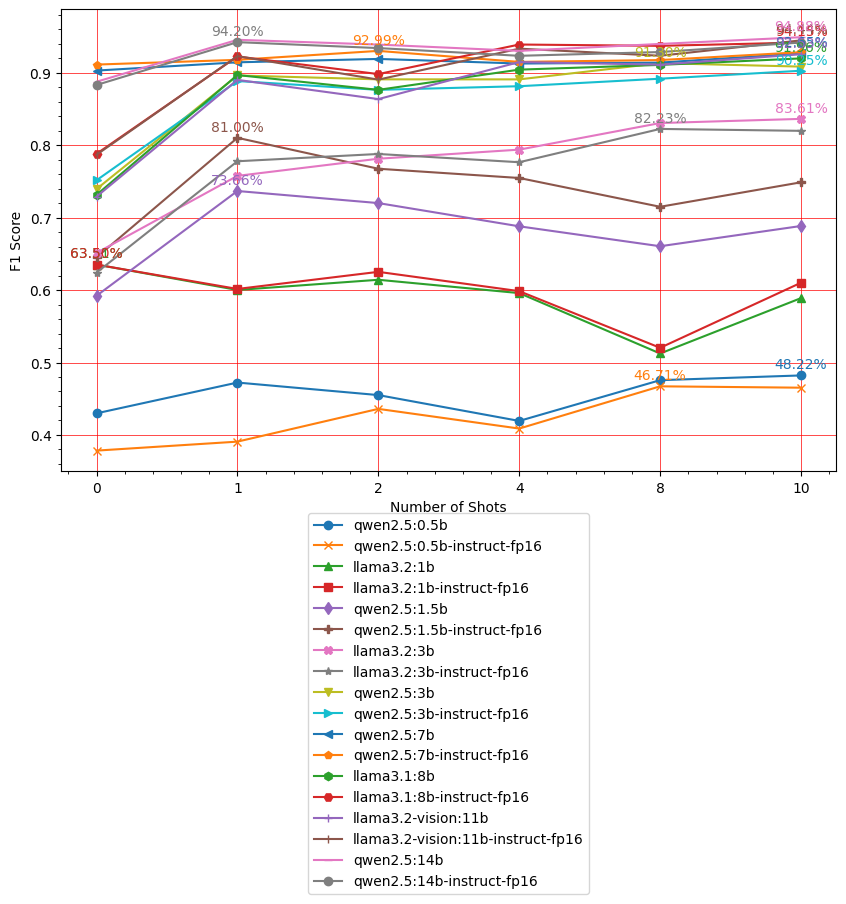

In [59]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.93),
)

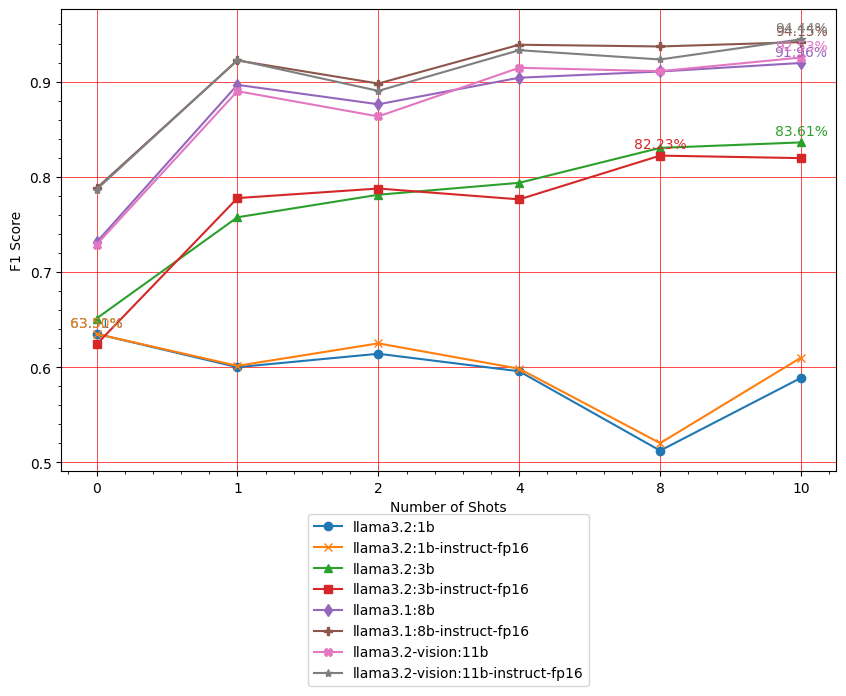

In [60]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.48),
)

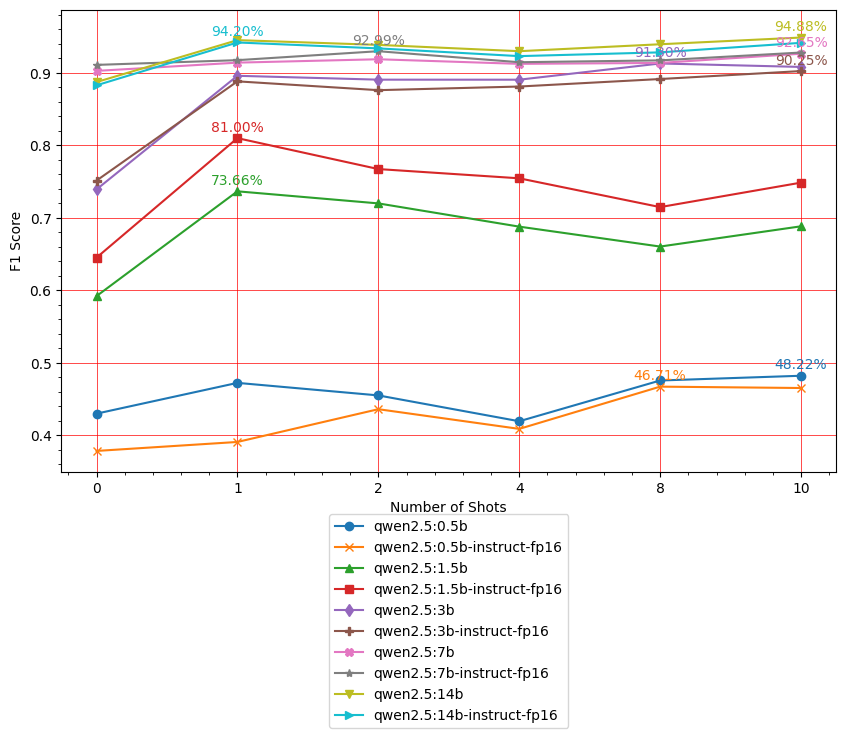

In [61]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.57),
)

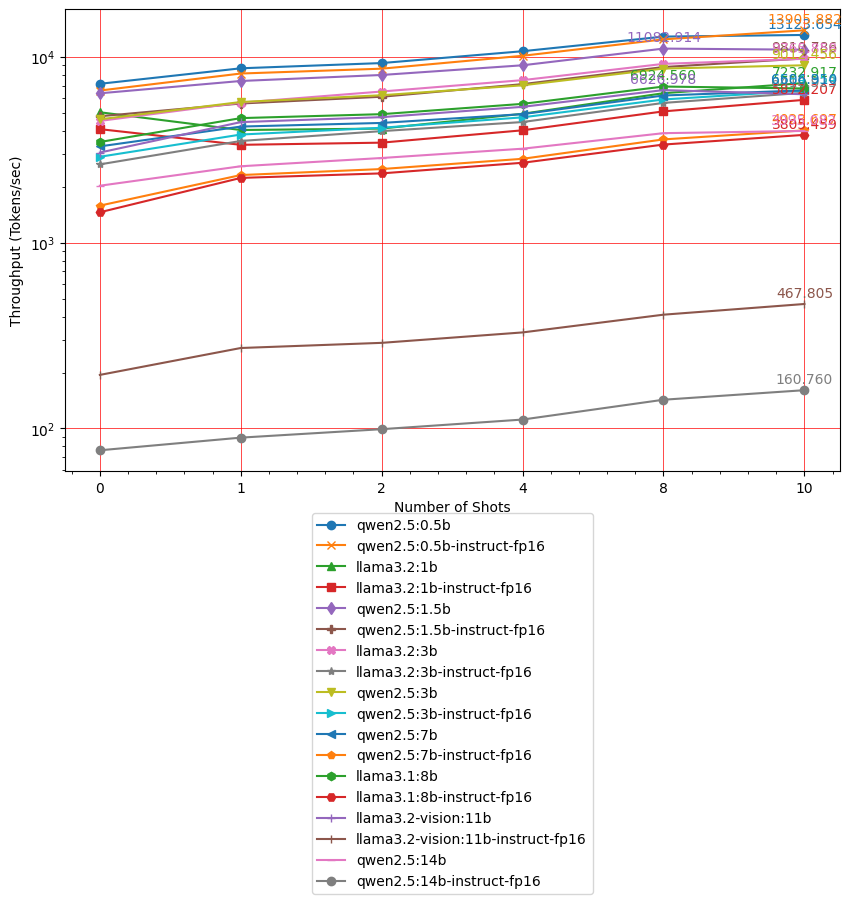

In [62]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.93),
    use_percentage=False,
)

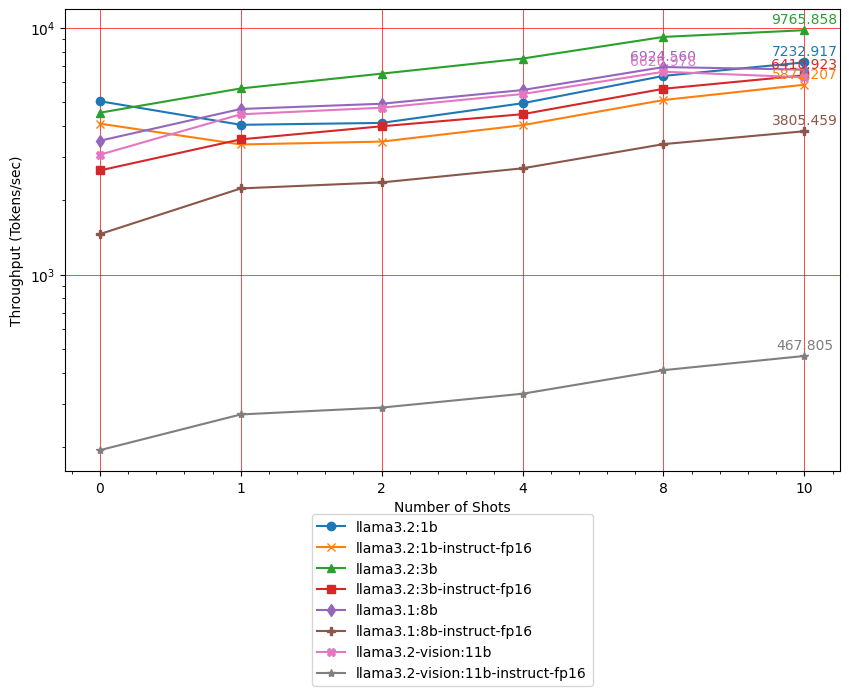

In [63]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.48),
    use_percentage=False,
)

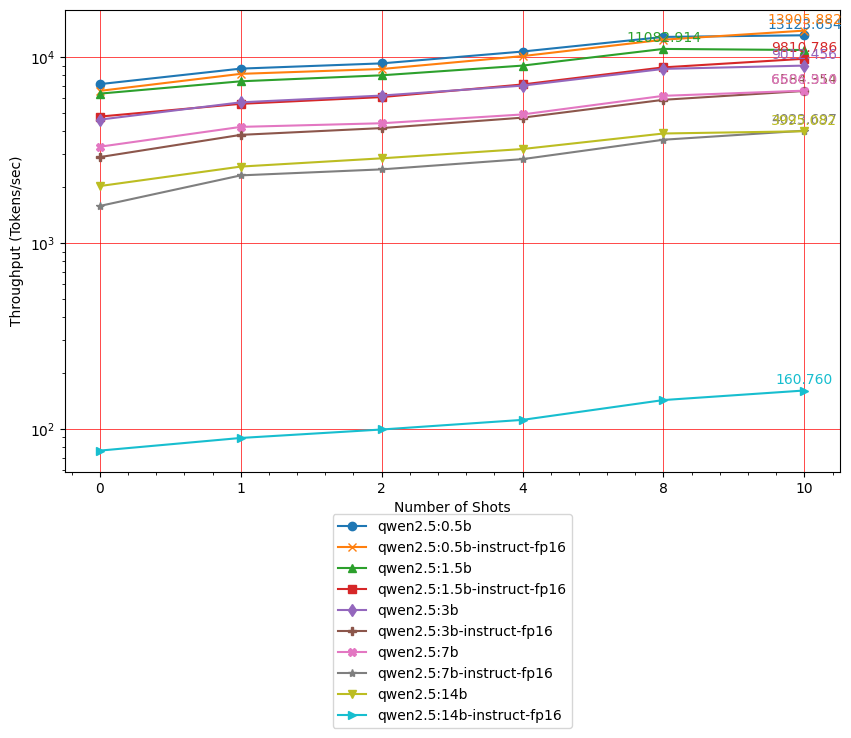

In [64]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.57),
    use_percentage=False,
)

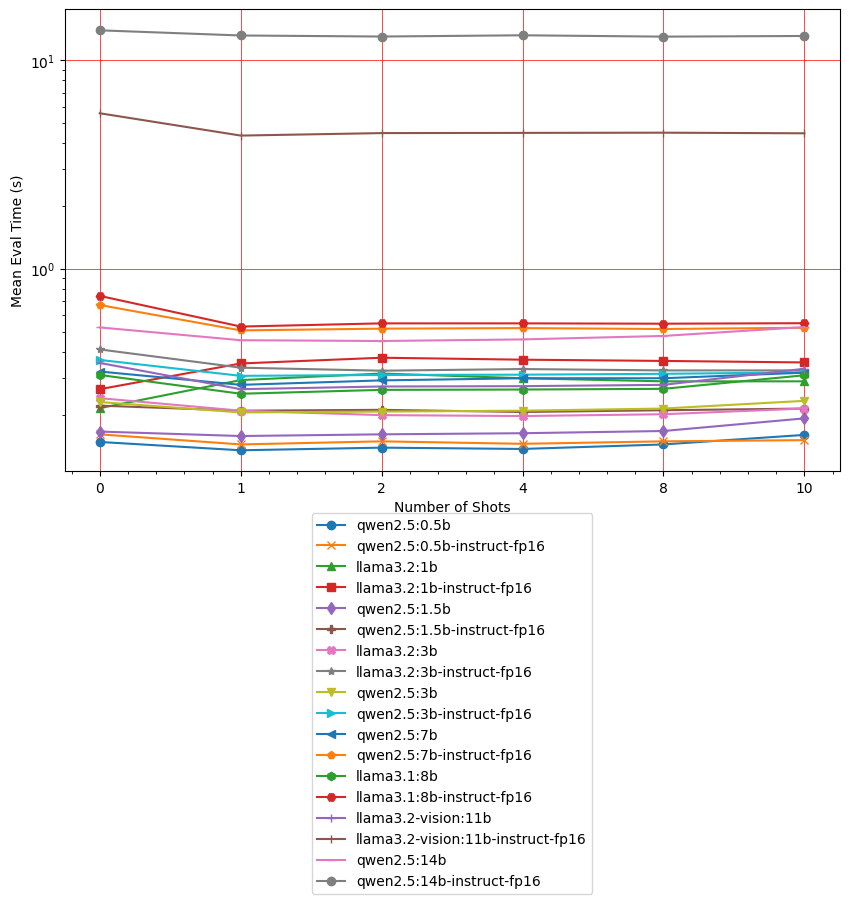

In [65]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Eval Time (s)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.93),
    use_percentage=False,
    add_values=False,
)

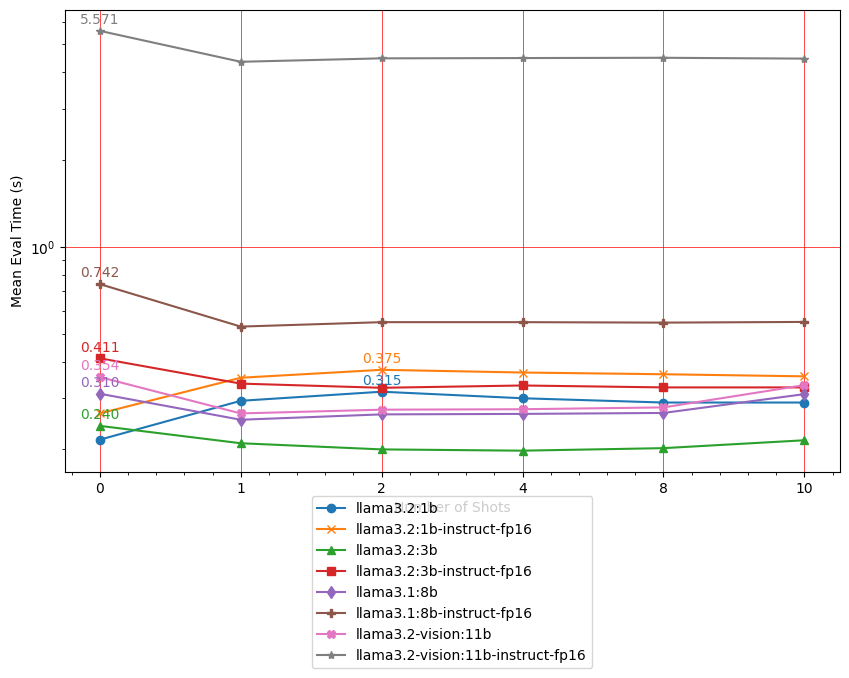

In [66]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["eval_time"],
    ["Mean Eval Time (s)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

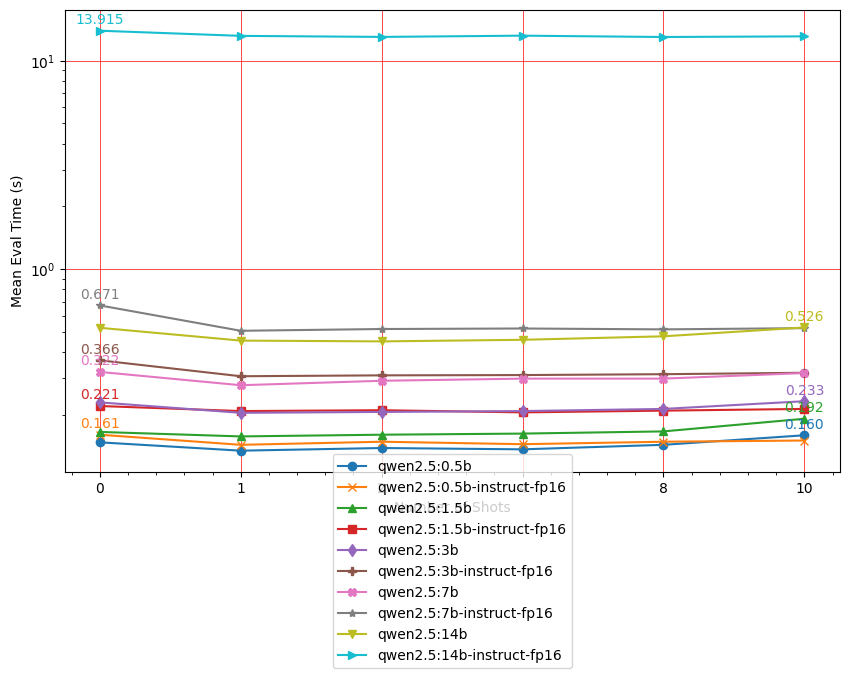

In [67]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["eval_time"],
    ["Mean Eval Time (s)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

In [68]:
top_metrics_df = get_top_metrics_df(metrics_df)
top_metrics_df

,model,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
5,qwen2.5:0.5b,10,0.160,0.482167,0.512642,0.0,0.0,0.949433,2408453,13123.654098
10,qwen2.5:0.5b-instruct-fp16,8,0.149,0.467142,0.482999,0.0,0.0,0.890148,2123961,12427.874291
12,llama3.2:1b,0,0.215,0.635100,0.581517,0.0,0.0,0.919791,1241648,5034.966850
18,llama3.2:1b-instruct-fp16,0,0.265,0.635037,0.582389,0.0,0.0,0.921534,1241394,4084.137455
25,qwen2.5:1.5b,1,0.158,0.736624,0.660854,0.0,0.0,0.976460,1344445,7418.609912
31,qwen2.5:1.5b-instruct-fp16,1,0.209,0.809998,0.766347,0.0,0.0,0.980820,1345192,5611.443207
41,llama3.2:3b,10,0.214,0.836121,0.829991,0.0,0.0,1.000000,2397108,9765.858110
46,llama3.2:3b-instruct-fp16,8,0.326,0.822263,0.816914,0.0,0.0,1.000000,2114116,5653.895732
52,qwen2.5:3b,8,0.214,0.913012,0.897995,0.0,0.0,0.994769,2123853,8652.612667
59,qwen2.5:3b-instruct-fp16,10,0.319,0.902539,0.887533,0.0,0.0,0.998256,2409169,6584.353896


/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


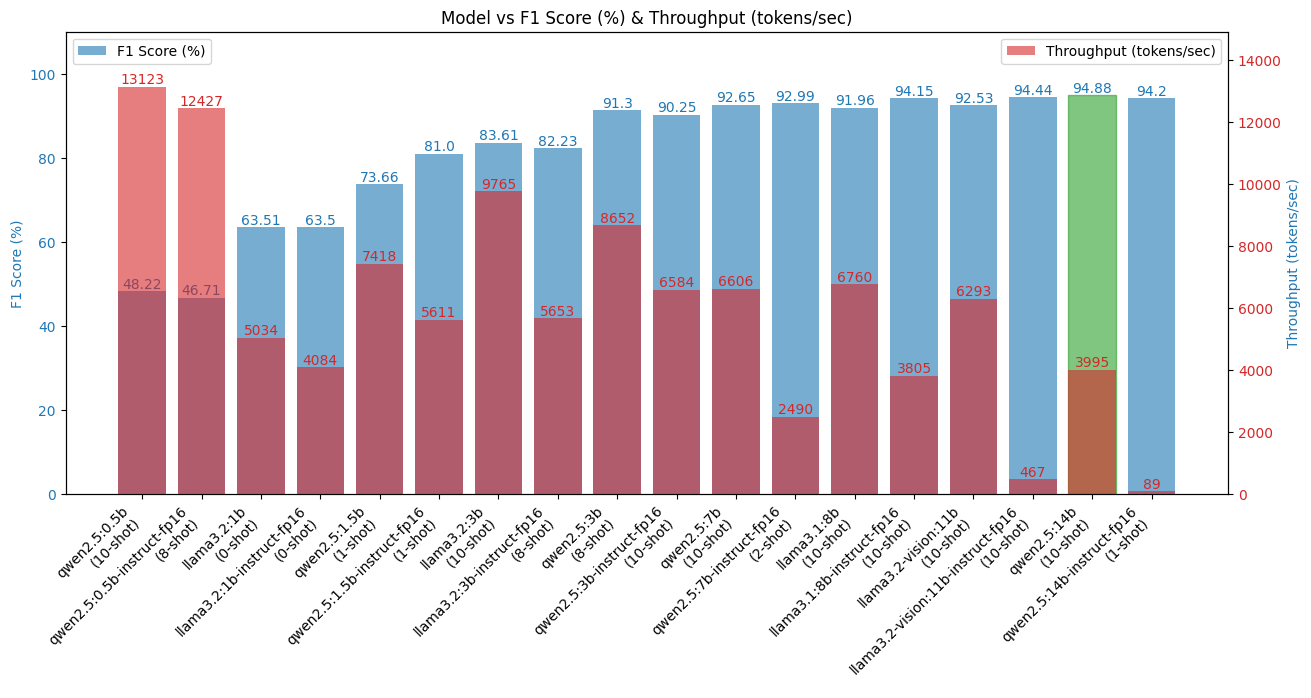

In [69]:
plot_metrics_bar_charts(top_metrics_df, second_ylim=[0, 14900])

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


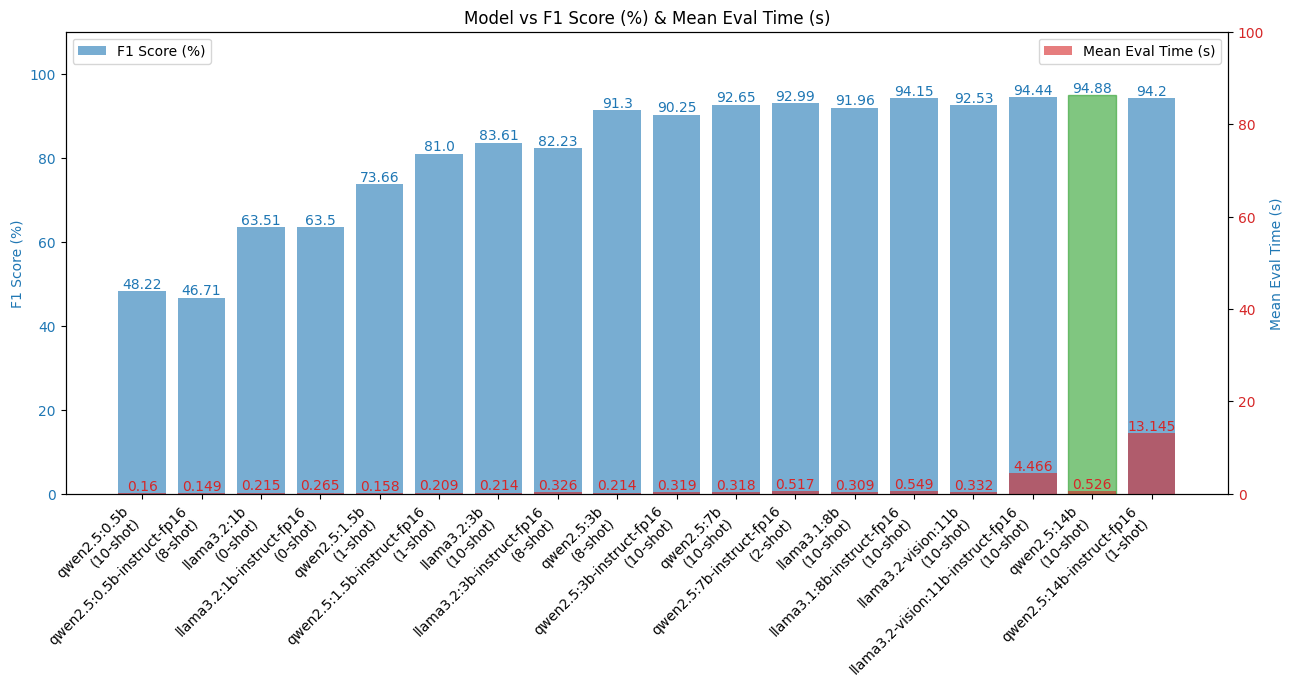

In [70]:
plot_metrics_bar_charts(
    top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [71]:
top_metrics_df2 = get_top_metrics_df(df2[df2["model"].isin(all_models)])
top_metrics_df2

,model,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
5,qwen2.5:0.5b,10,0.218,0.460776,0.498692,0.0,0.0,0.950305,2408392,9631.795750
11,qwen2.5:0.5b-instruct-fp16,10,0.269,0.461571,0.470793,0.0,0.0,0.934612,2408457,7805.903877
12,llama3.2:1b,0,0.451,0.633410,0.585004,0.0,0.0,0.936356,1241277,2399.544169
20,llama3.2:1b-instruct-fp16,2,0.736,0.641802,0.619878,0.0,0.0,1.000000,1485749,1759.965742
25,qwen2.5:1.5b,1,0.289,0.740926,0.655623,0.0,0.0,0.975588,1344085,4054.762989
31,qwen2.5:1.5b-instruct-fp16,1,0.380,0.786385,0.733217,0.0,0.0,0.984307,1344509,3084.726747
41,llama3.2:3b,10,0.553,0.843299,0.836966,0.0,0.0,1.000000,2396732,3778.600043
47,llama3.2:3b-instruct-fp16,10,0.756,0.828877,0.824760,0.0,0.0,1.000000,2396771,2764.020933
52,qwen2.5:3b,8,0.487,0.910320,0.892764,0.0,0.0,0.996513,2123680,3801.865056
59,qwen2.5:3b-instruct-fp16,10,0.677,0.902893,0.886661,0.0,0.0,0.999128,2409067,3102.392858


/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


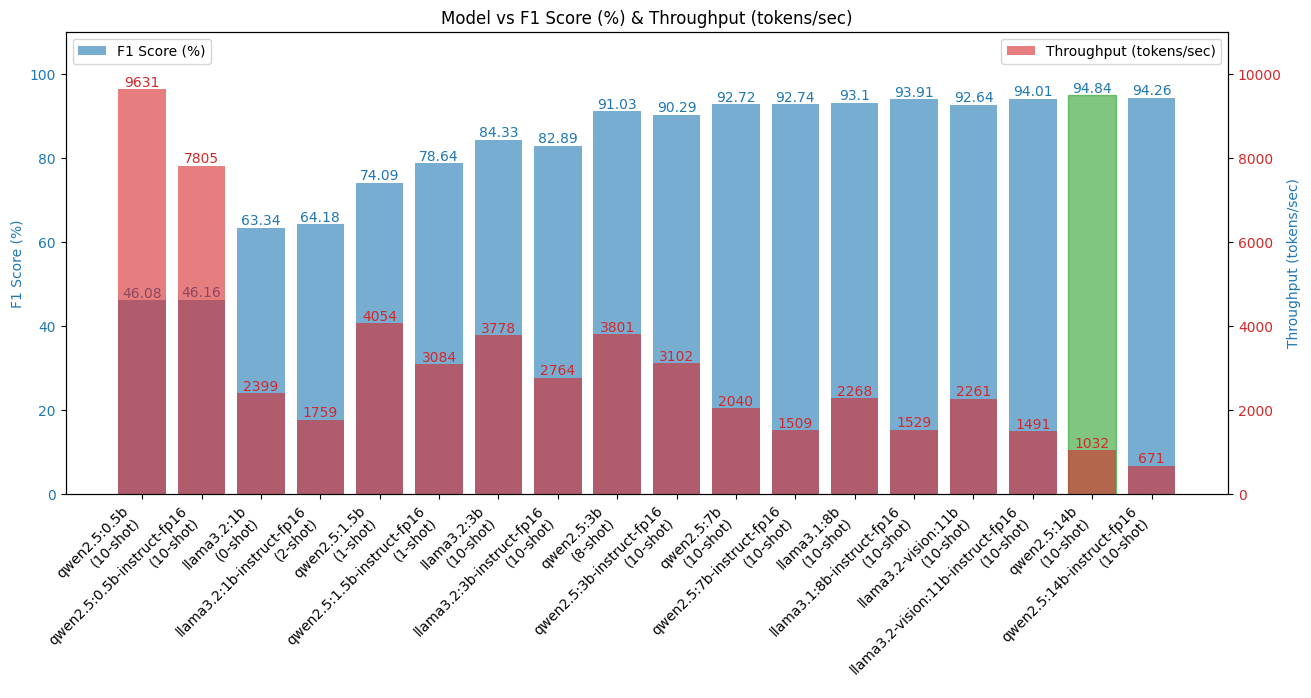

In [72]:
plot_metrics_bar_charts(top_metrics_df2, second_ylim=[0, 11000])

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


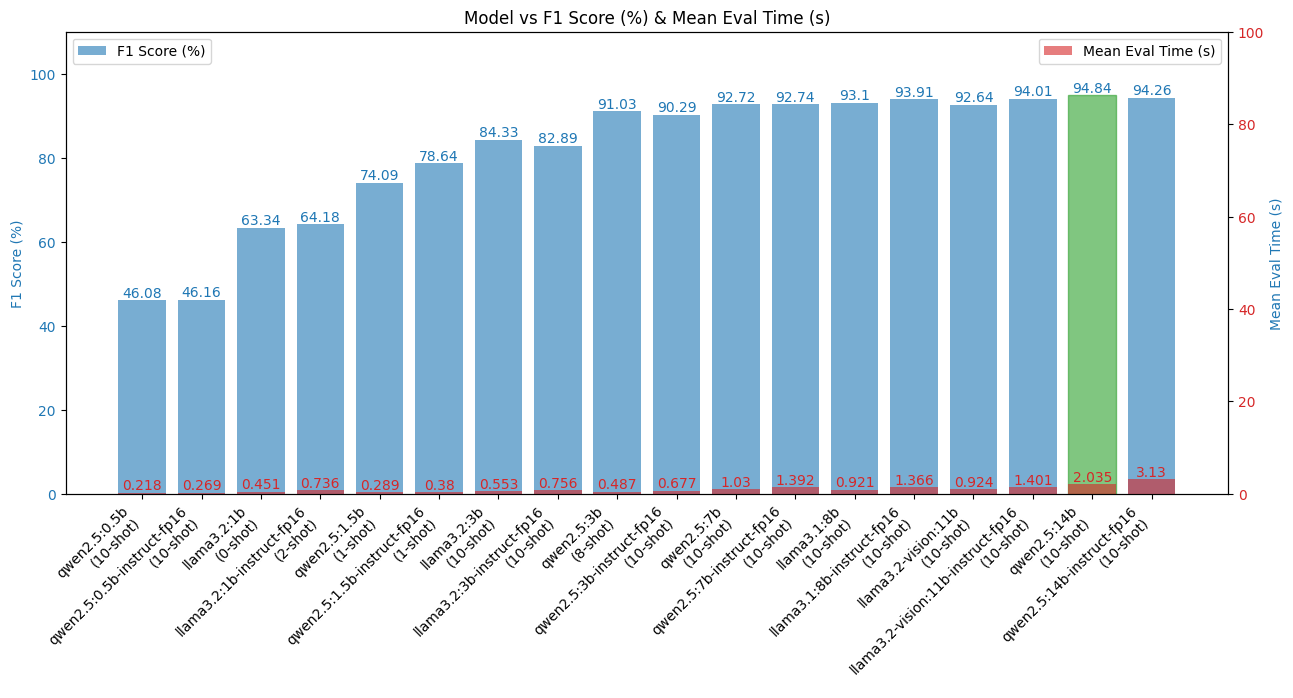

In [73]:
plot_metrics_bar_charts(
    top_metrics_df2,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [74]:
# plot metrics from top_metrics_df and top_metrics_df2, using two subplots. each subplot will have 2 bars for each model, one for f1 and one for eval_speed

def plot_metrics_bar_charts_2df(
    top_metrics_df, top_metrics_df2, second_ylim=[0, 17650]
):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    # fig.suptitle("Top Metrics Comparison")
    plot_metrics_bar_charts(
        top_metrics_df,
        ax=axs[0],
        second_ylim=second_ylim,
        ylim=(0, 135),
        title="(a) Top Performances at RTX 4090",
        # axis_ticks=(True, False),
        highlight_best=False,
        x_ticks=False,
    )
    plot_metrics_bar_charts(
        top_metrics_df2,
        ax=axs[1],
        second_ylim=second_ylim,
        ylim=(0, 135),
        title="(b) Top Performances at M4 Max",
        # axis_ticks=(False, True),
        highlight_best=False,
    )
    
    plt.tight_layout()

    # reduce space between subplots
    plt.subplots_adjust(hspace=0.12)

    plt.show()


/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


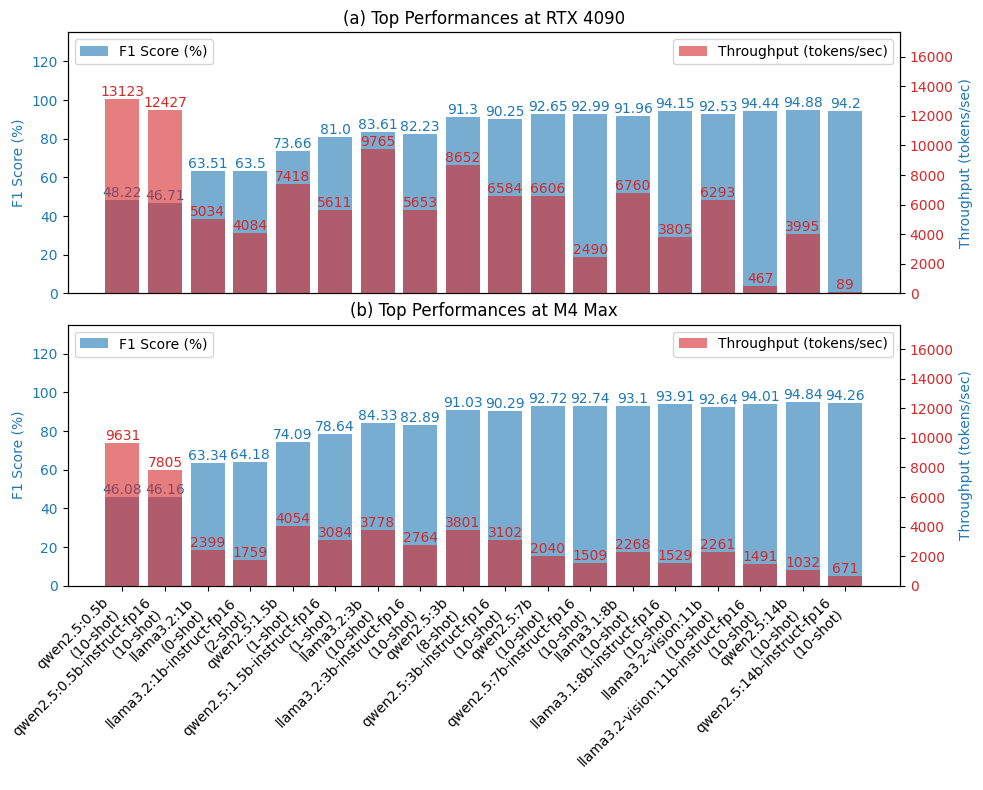

In [75]:
plot_metrics_bar_charts_2df(top_metrics_df, top_metrics_df2)

In [76]:
top_metrics_df.describe()

,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
count,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,1.800000e+01,18.000000
mean,6.611111,1.243944,0.817666,0.803981,0.0,0.0,0.979415,1.998770e+06,6048.132892
std,4.285940,3.130192,0.160121,0.163799,0.0,0.0,0.034761,4.976595e+05,3499.509774
min,0.000000,0.149000,0.467142,0.482999,0.0,0.0,0.890148,1.241394e+06,89.282740
25%,1.250000,0.214000,0.754967,0.687228,0.0,0.0,0.977550,1.378867e+06,4017.346035
50%,9.000000,0.313500,0.907775,0.892764,0.0,0.0,0.999128,2.260044e+06,5973.457619
75%,10.000000,0.470750,0.929062,0.924804,0.0,0.0,1.000000,2.396933e+06,7254.117215
max,10.000000,13.145000,0.948811,0.945074,0.0,0.0,1.000000,2.410321e+06,13123.654098


In [77]:
top_metrics_df2.describe()

,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
count,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,1.800000e+01,18.000000
mean,7.888889,0.945278,0.816252,0.803642,0.0,0.0,0.987601,2.154782e+06,3054.885450
std,3.833120,0.729597,0.163361,0.164900,0.0,0.0,0.022859,4.473607e+05,2292.076329
min,0.000000,0.218000,0.460776,0.470793,0.0,0.0,0.934612,1.241277e+06,671.607277
25%,8.500000,0.460000,0.752291,0.675022,0.0,0.0,0.987358,2.191805e+06,1586.999800
50%,10.000000,0.746000,0.906607,0.889712,0.0,0.0,1.000000,2.396594e+06,2334.041533
75%,10.000000,1.282000,0.930110,0.929817,0.0,0.0,1.000000,2.408914e+06,3609.548247
max,10.000000,3.130000,0.948369,0.945074,0.0,0.0,1.000000,2.411144e+06,9631.795750


In [78]:
top_metrics_df.to_csv("paper/data/ollama_model_results_v3-RTX4090_4bit_vs_fp16.csv", index=False)
top_metrics_df2.to_csv("paper/data/ollama_model_results_v3-M4_Max_4bit_vs_fp16.csv", index=False)

In [80]:
df_timing = pd.read_csv("logs/ollama_memory_footprints.csv")
df_timing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    46 non-null     object
 1   ID      46 non-null     object
 2   SIZE    46 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [82]:
top_metrics_df_all = get_top_metrics_df(df)
top_metrics_df_all

,model,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
5,qwen2.5:0.5b,10,0.160,0.482167,0.512642,0.0,0.0,0.949433,2408453,13123.654098
10,qwen2.5:0.5b-instruct-fp16,8,0.149,0.467142,0.482999,0.0,0.0,0.890148,2123961,12427.874291
12,llama3.2:1b,0,0.215,0.635100,0.581517,0.0,0.0,0.919791,1241648,5034.966850
18,llama3.2:1b-instruct-fp16,0,0.265,0.635037,0.582389,0.0,0.0,0.921534,1241394,4084.137455
25,qwen2.5:1.5b,1,0.158,0.736624,0.660854,0.0,0.0,0.976460,1344445,7418.609912
31,qwen2.5:1.5b-instruct-fp16,1,0.209,0.809998,0.766347,0.0,0.0,0.980820,1345192,5611.443207
41,llama3.2:3b,10,0.214,0.836121,0.829991,0.0,0.0,1.000000,2397108,9765.858110
46,llama3.2:3b-instruct-fp16,8,0.326,0.822263,0.816914,0.0,0.0,1.000000,2114116,5653.895732
52,qwen2.5:3b,8,0.214,0.913012,0.897995,0.0,0.0,0.994769,2123853,8652.612667
59,qwen2.5:3b-instruct-fp16,10,0.319,0.902539,0.887533,0.0,0.0,0.998256,2409169,6584.353896


In [84]:
load_memory = []
eval_memory = []

for idx, row in top_metrics_df_all.iterrows():
    model = row["model"]
    model_timing = df_timing[df_timing["NAME"] == model]
    load_memory.append(model_timing["SIZE"].iloc[0])
    eval_memory.append(model_timing["SIZE"].iloc[1])

top_metrics_df_all["load_memory"] = load_memory
top_metrics_df_all["eval_memory"] = eval_memory
top_metrics_df_all

,model,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed,load_memory,eval_memory
5,qwen2.5:0.5b,10,0.160,0.482167,0.512642,0.0,0.0,0.949433,2408453,13123.654098,1.4 GB,2.4 GB
10,qwen2.5:0.5b-instruct-fp16,8,0.149,0.467142,0.482999,0.0,0.0,0.890148,2123961,12427.874291,2.0 GB,3.0 GB
12,llama3.2:1b,0,0.215,0.635100,0.581517,0.0,0.0,0.919791,1241648,5034.966850,2.8 GB,5.3 GB
18,llama3.2:1b-instruct-fp16,0,0.265,0.635037,0.582389,0.0,0.0,0.921534,1241394,4084.137455,4.0 GB,6.5 GB
25,qwen2.5:1.5b,1,0.158,0.736624,0.660854,0.0,0.0,0.976460,1344445,7418.609912,2.1 GB,3.4 GB
31,qwen2.5:1.5b-instruct-fp16,1,0.209,0.809998,0.766347,0.0,0.0,0.980820,1345192,5611.443207,4.3 GB,5.6 GB
41,llama3.2:3b,10,0.214,0.836121,0.829991,0.0,0.0,1.000000,2397108,9765.858110,4.0 GB,8.2 GB
46,llama3.2:3b-instruct-fp16,8,0.326,0.822263,0.816914,0.0,0.0,1.000000,2114116,5653.895732,8.6 GB,12 GB
52,qwen2.5:3b,8,0.214,0.913012,0.897995,0.0,0.0,0.994769,2123853,8652.612667,3.1 GB,4.9 GB
59,qwen2.5:3b-instruct-fp16,10,0.319,0.902539,0.887533,0.0,0.0,0.998256,2409169,6584.353896,7.5 GB,9.3 GB


In [86]:
top_metrics_df_all.to_csv("paper/data/ollama_model_results_v3-RTX4090_memory_usage.csv", index=False)